# Solução de equações diferenciais ordinárias (EDO)


## Modelos de compartimentos para doenças infecciosas

Os modelos de compartimentos são uma técnica comum para modelagem matemática de doenças infecciosas. O modelo mais simples é o SIR, que contém 3 compartimentos onde uma população pode ser designada: Suscetível, Infecciosa, e Recuperada. Quando o modelo evolui a partir de uma determinada condição, a população vai mudando de compartimento. Os modelos foram desenvolvidos, entre outros,  por [Ross](https://royalsocietypublishing.org/doi/10.1098/rspa.1916.0007) em 1916, [Kermack & McKendrick](https://royalsocietypublishing.org/doi/10.1098/rspa.1927.0118) em 1927, [Kendal](https://projecteuclid.org/ebooks/berkeley-symposium-on-mathematical-statistics-and-probability/Proceedings-of-the-Third-Berkeley-Symposium-on-Mathematical-Statistics-and/chapter/Deterministic-and-Stochastic-Epidemics-in-Closed-Populations/bsmsp/1200502553) em 1956.


Os modelos resolvem equações diferenciais ordinárias (EDO), mas podem utilizar variáveis randômicas para introduzir mais realismo na modelagem das epidemias. 


## Modelo SIR

<img src="Figs/SIR.png" width=50% >


É um dos modelos mais simples, contudo, muitos outros modelos mais sofisticados são derivados deste modelo.  Possui 3 compartimentos 


* **S**: O número de indivíduos susceptíveis. Quando um indivíduo suscetível e um indivíduo infeccioso entram em "contacto infeccioso", o indivíduo suscetível contrai a doença e muda para o compartimento infeccioso.

* **I**: O número de indivíduos infecciosos. Estes são indivíduos que foram infectados e são capazes de infectar os indivíduos susceptíveis.

* **R**: Corresponde ao número de indivíduos removidos (e imunes) ou falecidos. Estes são indivíduos que foram infectados e recuperaram da doença e entraram no compartimento removido, ou morreram. Assume-se que o número de mortes é insignificante em relação à população total. Este compartimento também pode ser chamado "recuperado" ou "resistente".

Este modelo é razoavelmente bom para fazer previsões de doenças infecciosas que são transmitidas de humano para humano, e onde a recuperação confere resistência duradoura, tais como sarampo, papeira e rubéola. 


A evolução entre compartimentos se dá através das seguintes EDOs:

\begin{eqnarray}
\frac{dS}{dt} &=& -\frac{\beta IS}{N}, \\
\frac{dI}{dt} &=& \frac{\beta IS}{N} - \gamma I, \\
\frac{dR}{dt} &=& \gamma I,
\end{eqnarray}

Onde $\beta$ é o número médio de contactos por pessoa por unidade de tempo, multiplicado pela probabilidade de transmissão da doença atraves de um contacto entre um indivíduo susceptível e um sujeito infeccioso, e $SI/N^2$ é a fracção dos contactos entre um indivíduo infeccioso e um sujeito susceptível que resultam na infecção da pessoa susceptível. $N$ é a população total. Entre $I$ e $R$ a taxa de transição, $\gamma$, é considerada proporcional a $I$,

Note que 

$$
\frac{dS}{dt} + \frac{dI}{dt}  + \frac{dR}{dt} = 0
$$

Logo $S + I + R = {\rm constante} = N$.  

A dinâmica da infecção depende do parâmetro:

$$
R_0 = \frac{\beta}{\gamma}
$$

Que é chamado de número de reprodução.  $R_{0}$ representa a velocidade de reprodução no início da propagação quando todas as populações são consideradas susceptíveis, por exemplo, se $\beta_0 = 0.4$ dias$^{-1}$, e $\gamma_0 = 0.2$ dias$^{-1}$, significa que uma pessoa infecciosa em média infecta $0.4$ pessoas susceptíveis por dia,  e se recupera em $1/0.2=5$ dias. Assim, quando esta pessoa recuperou, ainda há duas pessoas infecciosas directamente infectadas por esta pessoa e $R_0 = 2$, ou seja, o número de pessoas infecciosas duplicou num ciclo de 5 dias. 


In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.special import erf
import pandas as pd
from scipy.integrate import odeint

In [55]:
def sir_func(x, t, *args):
    
    S,I,R = x
    N, beta, gamma,n = args
    
    dSdt = -beta*S*I/N 
    dIdt =  beta*S*I/N - gamma*I
    dRdt =  gamma*I
    
    return dSdt,dIdt,dRdt

In [69]:
def sird(N,beta,gamma,n):
    n = 120 # time steps    
    tmin = 0  # starting time
    tmax = 120. # ending time
    t = np.linspace(tmin,tmax,n)
    
    # Initial conditions
    
    I0 = 1.
    R0 = 0.
    S0 = N-I0-R0
    
    x0 = S0, I0, R0
    sol = odeint(sir_func,x0,t,args=(N, beta, gamma,n))
        
    return sol[:,0]/N, sol[:,1]/N, sol[:,2]/N, t

In [73]:
sI, iI, rI, t = sird(N=1e3, beta=0.4, gamma=0.2, n=0.)

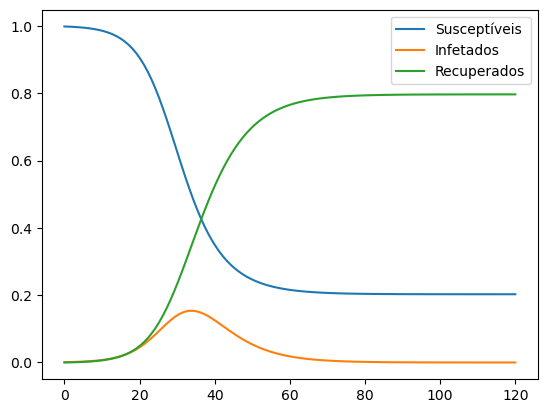

In [75]:
plt.plot(t,sI,label='Susceptíveis')
plt.plot(t,iI,label='Infetados')
plt.plot(t,rI,label='Recuperados')
plt.legend()